In [1]:
import pandas as pd
import pandasql as psql

# Load the CSV into a DataFrame
data = pd.read_csv('/Users/brendanhall/Do Not Sync/SIE-Graduate-Research-w-Max/Thesis Data/Database/Translation/results_1upAlpha.csv')

In [21]:
#shows all occurances of X and Y

import pandas as pd

# SQL query
sql_query = '''
WITH TranslationalDB AS (
    SELECT * FROM data
)

SELECT DISTINCT AH, AW, BH, BW
FROM TranslationalDB
where name is "B"
INTERSECT
SELECT DISTINCT AH, AW, BH, BW
FROM TranslationalDB
where name is "C"
'''

result1 = psql.sqldf(sql_query, locals())

In [34]:
print(result1)

      AH  AW  BH  BW
0      3   4   3   4
1      3   4   3   5
2      3   4   3   6
3      3   4   3   7
4      3   4   3   8
...   ..  ..  ..  ..
3964  10  10  10   6
3965  10  10  10   7
3966  10  10  10   8
3967  10  10  10   9
3968  10  10  10  10

[3969 rows x 4 columns]


In [42]:
#Shows all occurances of X and Y and where they are neighbors

sql_query_1 = '''
WITH TranslationalDB AS (
    SELECT * FROM data
)

SELECT DISTINCT AH, AW, BH, BW
FROM TranslationalDB
WHERE name = "C"
INTERSECT
SELECT DISTINCT AH, AW, BH, BW
FROM TranslationalDB
WHERE name = "D"
'''

result1 = psql.sqldf(sql_query_1, locals())

if not result1.empty:
    sql_query_2 = '''
    WITH TranslationalDB AS (
        SELECT * FROM data
    )

    SELECT  s1.ah, s1.aw, s1.bh, s1.bw
    FROM TranslationalDB AS s1
    INNER JOIN TranslationalDB AS s2 ON (
        s1.pos1 = s2.pos1 AND
        s1.pos2 = (s2.pos2 - 1) AND
        s1.ah = s2.ah AND
        s1.aw = s2.aw AND
        s1.bh = s2.bh AND
        s1.bw = s2.bw
    )
    where s1.name = "C" and s2.name = "D"
    UNION
    SELECT  s1.ah, s1.aw, s1.bh, s1.bw
    FROM TranslationalDB AS s1
    INNER JOIN TranslationalDB AS s2 ON (
        s1.pos1 = (s2.pos1 - 1) AND
        s1.pos2 = s2.pos2 AND
        s1.AH = s2.AH AND
        s1.AW = s2.AW AND
        s1.BH = s2.BH AND
        s1.BW = s2.BW
    )
    where s1.name = "C" and s2.name = "D"
    '''

    result2 = psql.sqldf(sql_query_2, locals())

In [44]:
print(result2)

    AH  AW  BH  BW
0    3   4   3   4
1    3   4   4   4
2    3   4   5   4
3    4   3   4   3
4    4   3   4   4
..  ..  ..  ..  ..
62   9   4   9   4
63   9   4  10   4
64  10   4   8   4
65  10   4   9   4
66  10   4  10   4

[67 rows x 4 columns]


In [43]:
print(result1)

     AH  AW  BH  BW
0     3   4   3   4
1     3   4   4   3
2     3   4   4   4
3     3   4   5   3
4     3   4   5   4
..   ..  ..  ..  ..
760  10  10   8  10
761  10  10   9  10
762  10  10  10   8
763  10  10  10   9
764  10  10  10  10

[765 rows x 4 columns]


In [ ]:
## edges based on sizes
sql_query_2 = '''
    WITH TranslationalDB AS (
        SELECT * FROM data
    )

    SELECT  s1.name, s2.name
    FROM TranslationalDB AS s1
    INNER JOIN TranslationalDB AS s2 ON (
        s1.pos1 = s2.pos1 AND
        s1.pos2 = (s2.pos2 - 1) AND
        s1.ah = s2.ah AND
        s1.aw = s2.aw AND
        s1.bh = s2.bh AND
        s1.bw = s2.bw
    )
    where s1.ah = 4 and s1.aw = 4 and s1.bh = 4 and  s1.bw = 4
    UNION
    SELECT  s1.name, s2.name
    FROM TranslationalDB AS s1
    INNER JOIN TranslationalDB AS s2 ON (
        s1.pos1 = (s2.pos1 - 1) AND
        s1.pos2 = s2.pos2 AND
        s1.AH = s2.AH AND
        s1.AW = s2.AW AND
        s1.BH = s2.BH AND
        s1.BW = s2.BW
    )
    where s1.ah = 4 and s1.aw = 4 and s1.bh = 4 and  s1.bw = 4
    '''

result4 = psql.sqldf(sql_query_2, locals())

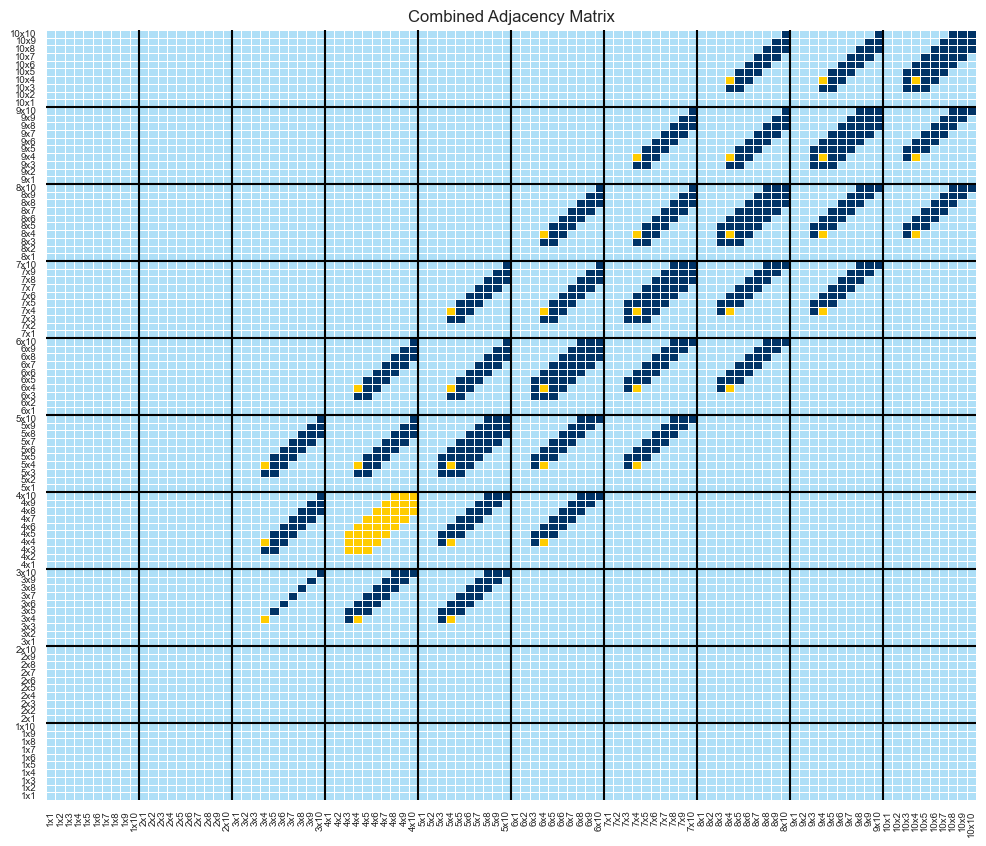

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data

def generate_raster_labels():
    return [f"{i}x{j}" for i in range(1, 11) for j in range(1, 11)]

def generate_adjacency_matrix(df):
    matrix = np.zeros((100, 100), dtype=int)

    for _, row in df.iterrows():
        ah, aw = row['AH'], row['AW']
        bh, bw = row['BH'], row['BW']
        matrix[10*(ah-1) + aw-1][10*(bh-1) + bw-1] += 1

    return matrix

def combine_results(result1, result2):
    matrix1 = generate_adjacency_matrix(result1)
    matrix2 = generate_adjacency_matrix(result2)

    # Using 1 for result1, and 2 for result2. 0 remains as no data.
    combined = np.where(matrix1 > 0, 1, 0)

    # Now, overwrite with result2
    combined[matrix2 > 0] = 2

    return combined

def plot_combined_adjacency_matrix(matrix, labels):
    plt.figure(figsize=(12, 10))

    # Create a custom colormap: 0: light blue, 1: color of result1, 2: color of result2
    cmap = sns.color_palette(['#AEDFF7', '#003366', '#FFCC00'])



    sns.heatmap(matrix, cmap=cmap, linewidths=0.5, cbar=False, xticklabels=labels, yticklabels=labels)

    plt.title('Combined Adjacency Matrix')
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)

    for i in range(10, 100, 10):
        plt.axhline(y=i, color='black', linewidth=1.5)
        plt.axvline(x=i, color='black', linewidth=1.5)

    plt.gca().invert_yaxis()  # Invert the Y-axis
    plt.show()

combined_matrix = combine_results(result1, result2)
plot_combined_adjacency_matrix(combined_matrix, generate_raster_labels())
